In [1]:
pip install numpy

In [9]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.0 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 3.6 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 3.8 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.0 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 4.0 MB/s eta 0:00:02
   -------------------------- -----------

In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Module 6 Assignment: fashion MNIST classification
# Name: Etimbuk Edet Bassey
# MSc, Nexford University
# BAN6420 Python and R programming
# Prof. Raphael

In [5]:
import tensorflow as tf

In [17]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Input
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
# Loading the Fashison MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
# Dimensions of the training data and labels respectively.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [23]:
x_train[:0]

array([], shape=(0, 28, 28), dtype=uint8)

In [24]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Änkel boot"] 

In [56]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Änkel boot']

# Visualizing the sample

In [58]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

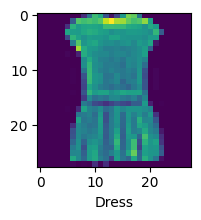

In [59]:
plot_sample(x_train, y_train, 3)

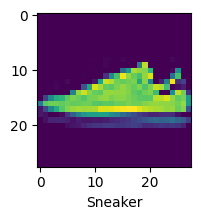

In [61]:
plot_sample(x_train, y_train, 6)

In [29]:
# Define input shape using the Input layer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape =(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded labels
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.6873 - loss: 1.2296 - val_accuracy: 0.8390 - val_loss: 0.4250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8484 - loss: 0.4307 - val_accuracy: 0.8744 - val_loss: 0.3468
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8716 - loss: 0.3629 - val_accuracy: 0.8662 - val_loss: 0.3731
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8776 - loss: 0.3302 - val_accuracy: 0.8867 - val_loss: 0.3282
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8884 - loss: 0.3029 - val_accuracy: 0.8716 - val_loss: 0.3591
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8927 - loss: 0.2922 - val_accuracy: 0.8887 - val_loss: 0.3155
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8988 - loss: 0.2800 - val_accuracy: 0.8883 - val_loss: 0.3261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9028 -

In [31]:
cnn = model.evaluate(x_test,y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8846 - loss: 0.3450


In [46]:
# Define the cnn model
cnn = Sequential()

# Adding layers to the model
cnn.add(Conv2D(filters=64,kernel_size=(3, 3), activation ='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2))),
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the model
cnn.fit(x_train, y_train_one_hot, epochs=10, validation_data=(x_test, y_test_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8025 - loss: 4.3539 - val_accuracy: 0.8784 - val_loss: 0.3498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.8979 - loss: 0.2804 - val_accuracy: 0.8826 - val_loss: 0.3301
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9124 - loss: 0.2416 - val_accuracy: 0.8873 - val_loss: 0.3446
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9227 - loss: 0.2108 - val_accuracy: 0.8952 - val_loss: 0.3295
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9307 - loss: 0.1867 - val_accuracy: 0.8878 - val_loss: 0.3772
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9373 - loss: 0.1678 - val_accuracy: 0.8908 - val_loss: 0.4180
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9437 - loss: 0.1511 - val_accuracy: 0.8900 - val_loss: 0.4066
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9477 -

# Training Accuracy and Loss: interpretation
The model training accurancy improving from 80.25% to 96.07% accuracy.
 While validation accuracy started strong (88%) and improved to (89%)                                                                                                                                                                                                                

In [53]:
cnn.evaluate(x_test,y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8914 - loss: 0.4909


[0.4892050325870514, 0.8938000202178955]

In [62]:
# Evaluate the model performance
test_loss, test_accurancy = model.evaluate(x_test, y_test_one_hot)
print(f"Test accuracy: {test_accurancy * 100:.4f}") 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8835 - loss: 0.4394
Test accuracy: 88.4100


In [54]:
y_pred_classes = cnn.predict(x_test)
y_pred_classes[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.1015721e-29, 8.6162202e-34, 1.3745767e-30, 9.5774195e-28,
        4.4961565e-24, 1.4461931e-15, 1.6842849e-27, 1.8201668e-12,
        1.9715637e-27, 1.0000000e+00],
       [2.2023785e-06, 7.1575422e-14, 9.9999785e-01, 9.6030632e-09,
        1.7143235e-11, 2.2599170e-23, 7.4873725e-11, 9.4380975e-27,
        3.1579454e-18, 5.9022007e-27],
       [6.2849844e-34, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0905450e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.0854712e-23, 1.0000000e+00, 0.0000000e+00, 2.3380156e-26,
        7.5826225e-24, 6.8663811e-35, 7.5719807e-33, 0.0000000e+00,
        3.0457660e-34, 0.0000000e+00],
       [1.9110160e-01, 6.2001426e-10, 4.0123938e-04, 2.2119020e-06,
        6.5222281e-05, 3.0502937e-12, 8.0842960e-01, 4.6839425e-11,
        2.4600021e-07, 7.3422986e-16]], dtype=float32)

# Interpretation of the array element
 Each row in the array corresponds to one test sample.

 Example of the first row which contain prediction of test sample in class
 [3.1015721e-29, 8.6162202e-34, 1.3745767e-30, 9.5774195e-28,
        4.4961565e-24, 1.4461931e-15, 1.6842849e-27, 1.8201668e-12,
        1.9715637e-27, 1.0000000e+00]


Each value in the array is a probability (between 0 and 1) assigned by the model to a specific class. The higher the value, the more confident the model is that the test sample belongs to that class.

In [64]:
# predicting class 
y_pred_classes = [np.argmax(y_pred, axis=1)]
y_pred_classes[:5]

y_test = [np.argmax(y_test_one_hot, axis=1)]
y_test[:5]

[array([9, 2, 1, ..., 8, 1, 5], dtype=int64)]

# Data Visualization

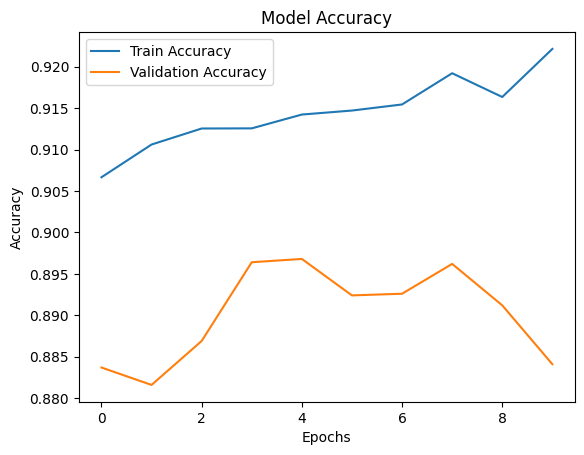

In [76]:
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"], label='Train Accuracy')  # Corrected to use `history`
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')  # Corrected key for validation accuracy
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()

# Interpretation
This indicate that the Higher training accuracy he model is getting better at the training data.
Accuracy of validation increases indicate that the model is capable of performing well with on unseen data.
The gap between the both lines, show that they is a good measure of generalization.


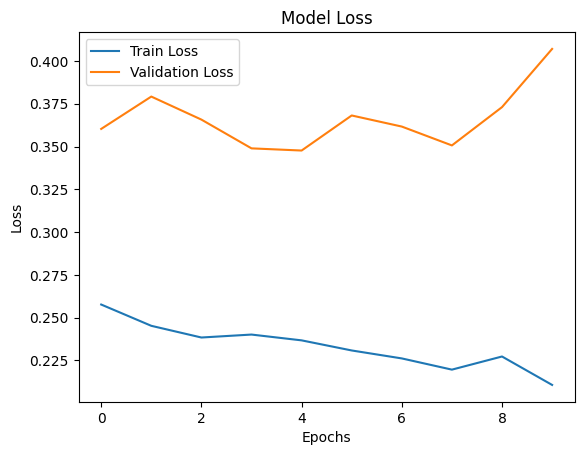

In [69]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


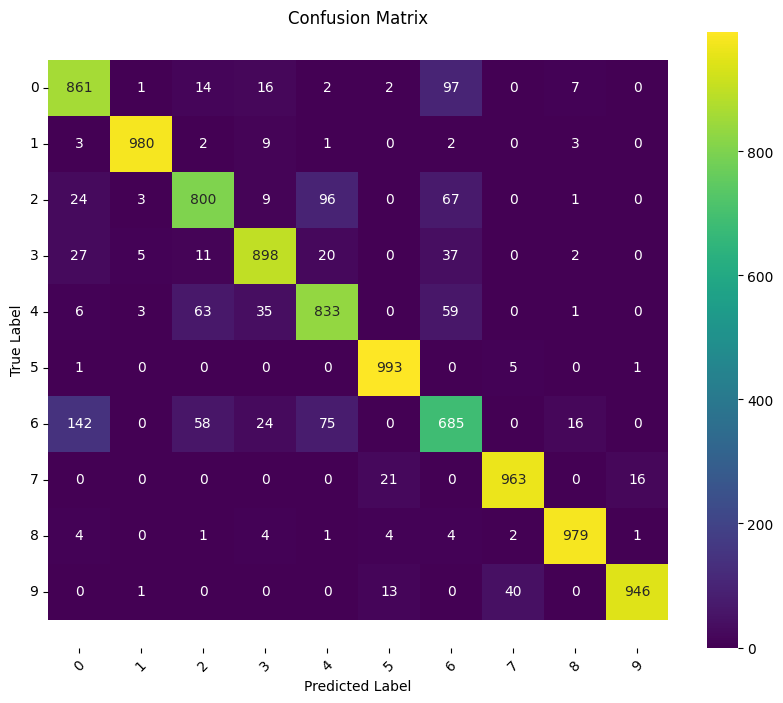

In [81]:
# Predict labels for the test set
y_pred = cnn.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_one_hot.argmax(axis=1), y_pred_classes)  # If y_test is one-hot encoded

# Plot the confusion matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')  # Corrected line
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# Add legends for the heatmap
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()